# Прогнозирование цены

### Задача
Целевая переменная — `price`. У вас есть 4 атрибута, и, очевидно, мы хотим, чтобы вы построили некую модель машинного обучения, которая прогнозирует цены.

1. Проведите первоначальный анализ данных.
2. Используйте ML модель и кратко объясните свой выбор.
3. Покажите точность вашей модели и прокомментируйте результаты.
4. Представьте нам результаты и шаги, которые вы предприняли, а также некоторые критические размышления.

### Описание данных
Данные представлены в файле `price_sample.csv`.

### Комментарии

Определите, обучите и оцените прогнозирующую модель, которая принимает в качестве входных данных предоставленные данные. По вашему усмотрению вы можете разделить данные на наборы для обучения, тестирования. 

Убедитесь, что решение отражает весь ваш мыслительный процесс (для каждой ячейки кода оставляйте комментарии, иначе мы не поймем, что вы хотели сделать)

### Что мы точно хотим увидеть в вашей работе?

1. **Анализ данных**: Проведение первичного анализа данных для понимания их структуры и основных характеристик. 

2. **Обработка данных**: Это критически важный шаг, который включает в себя очистку данных, обработку пропущенных значений и дубликатов.

3. **Оценка модели**: Обучение и тестирование подходящей модели и оценка ее производительности с использованием релевантных метрик. 

Первые 5 строк данных:
   para1  para2    para3  para4   price
0      1  662.0   3000.0    3.8   73.49
1      1  340.0   2760.0    9.2  300.00
2      0   16.0   2700.0    3.0  130.00
3      1   17.0  12320.0    6.4  365.00
4      1  610.0   2117.0   10.8  357.50

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   para1   10003 non-null  int64  
 1   para2   9997 non-null   float64
 2   para3   10003 non-null  float64
 3   para4   9998 non-null   float64
 4   price   10003 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 390.9 KB
None

Описание данных:
              para1        para2         para3        para4         price
count  10003.000000  9997.000000  10003.000000  9998.000000  10003.000000
mean       1.380986   447.270681   9547.975527     8.458024    433.774924
std        3.500408   220.913801   8022.286943     

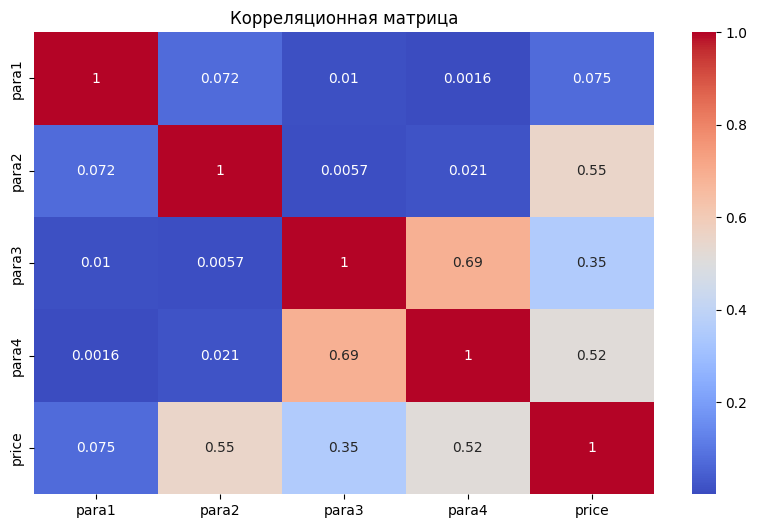


Среднеквадратическая ошибка (MSE): 28811.785157576367
Коэффициент детерминации (R²): 0.5883965715449897


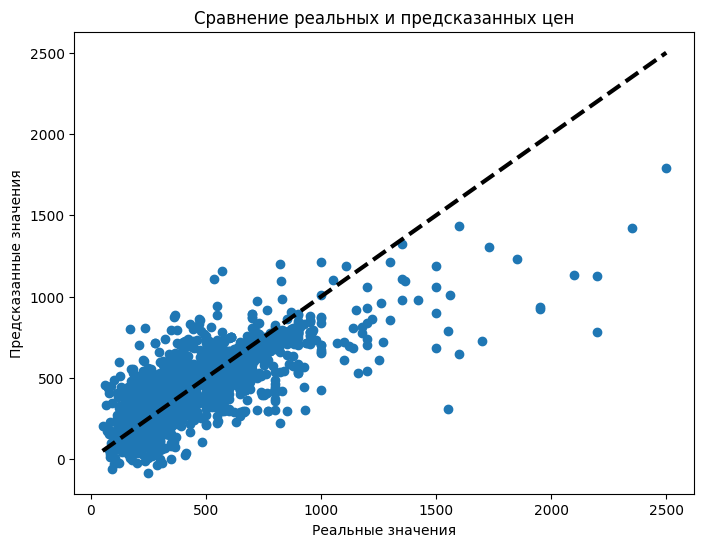

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Загрузка данных
data = pd.read_csv('C:/Users/Olya/Downloads/price_sample.csv')


# 2. Первичный анализ данных
# Просмотр первых строк, типа данных и наличие пропущенных значений
print("Первые 5 строк данных:")
print(data.head())

print("\nИнформация о данных:")
print(data.info())

print("\nОписание данных:")
print(data.describe())


# 3. Обработка данных
# Проверка на наличие дубликатов
print("\nКоличество дубликатов:", data.duplicated().sum())

# Проверка на наличие пропущенных значений
print("\nПропущенные значения в данных:")
print(data.isnull().sum())

# Удаление пропущенных значений (если их немного) или заполнение
data = data.dropna()


# 4. Визуализация данных
# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


# 5. Подготовка данных для модели
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns='price')  
y = data['price'] 

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Обучение модели
# Выбор линейной регрессии как начальной модели
model = LinearRegression()
model.fit(X_train, y_train)


# 7. Оценка модели
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nСреднеквадратическая ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R²): {r2}")


# 8. Визуализация результатов
# Визуализация сравнения реальных и предсказанных цен
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение реальных и предсказанных цен')
plt.show()

